### Import required modules

In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
from porousmedialab.batch import Batch
import numpy as np
import seaborn as sns
%matplotlib inline

### Initiate the model

In [2]:
bl = Batch(tend = 30, dt = 0.1)

### Add titrand in the model

In [3]:
C_init=0.1/4
bl.add_species(name='H3PO4', init_conc=C_init)
bl.add_species(name='H2PO4', init_conc=C_init)
bl.add_species(name='HPO4', init_conc=C_init)
bl.add_species(name='PO4', init_conc=C_init)

bl.add_acid(species=['H3PO4', 'H2PO4', 'HPO4', 'PO4'], pKa=[2.148, 7.198, 12.375])

### Add Titrant: $Na^+$

In [4]:
bl.add_species(name='Na', init_conc=0)
bl.add_species(name='NaOH', init_conc=0)
bl.add_acid(species=['Na', 'NaOH'], charge=1, pKa=[13.8])

### Slowly increase the concetration of titrant

In [5]:
bl.dcdt['NaOH'] = '1e-2'  # units of mass per units of time

### Solve

In [6]:
bl.solve()

Simulation started:
	 2020-07-02 20:10:02


Estimated time of the code execution:
	 0h:00m:01s
Will finish approx.:
	 2020-07-02 20:10:04


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


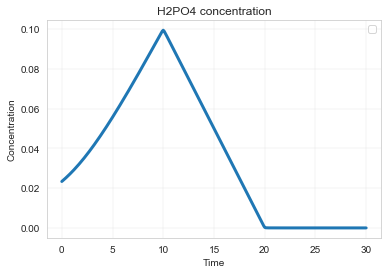

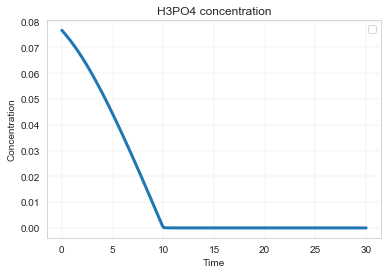

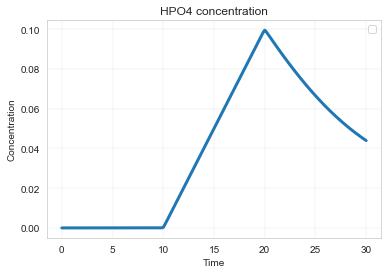

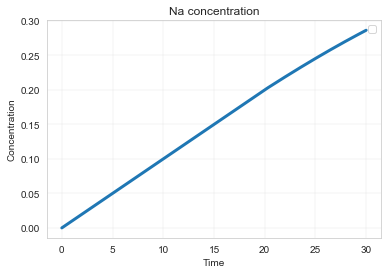

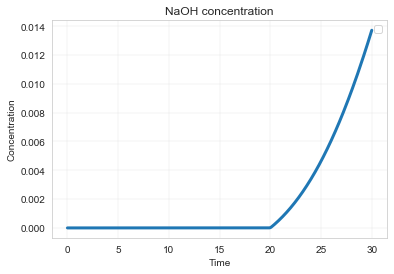

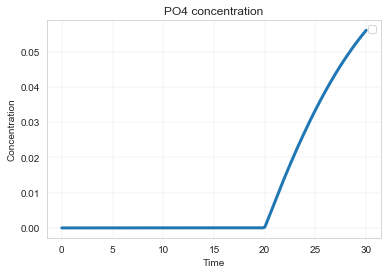

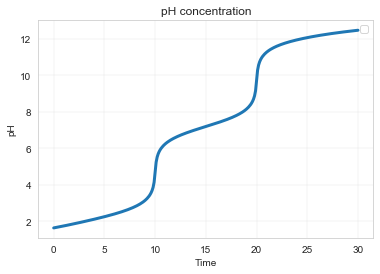

In [7]:
bl.plot_profiles()

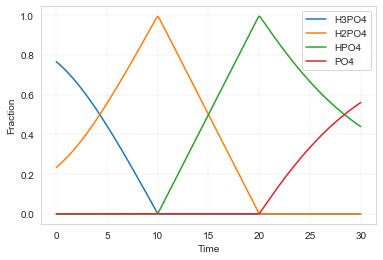

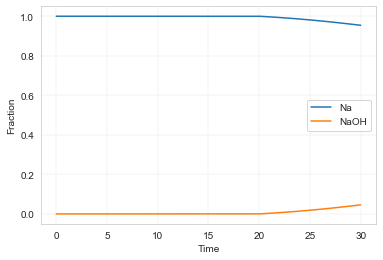

In [8]:
bl.plot_fractions()

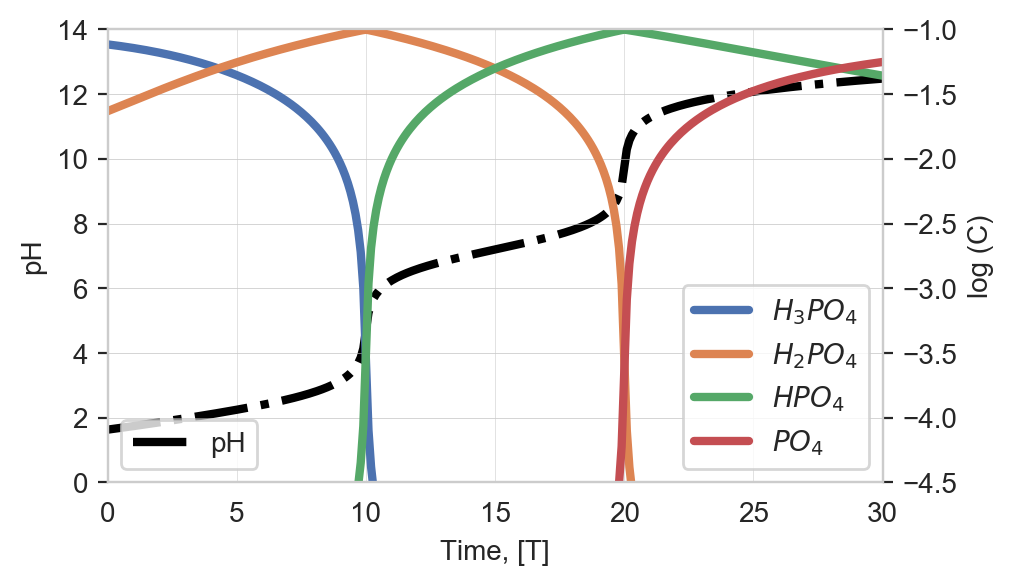

In [9]:
fig, ax1 = plt.subplots(figsize=(5,3), dpi=200)
ax2 = ax1.twinx()
ax1.plot(bl.time, bl.pH['concentration'][0], 'k-.', lw=3, label='pH')
ax2.plot(bl.time, np.log10(bl.H3PO4['concentration'][0]), c=sns.color_palette("deep", 10)[0], label='$H_3PO_4$', lw=3)
ax2.plot(bl.time, np.log10(bl.H2PO4['concentration'][0]), c=sns.color_palette("deep", 10)[1], label='$H_2PO_4$', lw=3)
ax2.plot(bl.time, np.log10(bl.HPO4['concentration'][0]), c=sns.color_palette("deep", 10)[2],label='$HPO_4$', lw=3)
ax2.plot(bl.time, np.log10(bl.PO4['concentration'][0]), c=sns.color_palette("deep", 10)[3],label='$PO_4$', lw=3)
ax1.set_ylim(0,14)
ax2.set_ylim(-4.5,-1)
ax1.grid(lw=0.2)
ax2.grid(lw=0.2)
ax1.set_xlabel('Time, [T]')
ax1.set_xlim(0,30)
ax1.set_ylabel('pH')
ax2.set_ylabel('log (C)')
ax2.legend(loc=4, frameon=1)
ax1.legend(loc=3, frameon=1)